## Customer Lifetime Value Prediction - Celebal Technologies

### User ID: CT_CSI_DS_5045
### Domain: Data Science
#### Resource: https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [2]:
df = pd.read_excel("online_retail_II.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"])

In [3]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [4]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df2.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [6]:
data = df1._append(df2)

In [7]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [9]:
data.shape

(1067371, 8)

### Error Handling

In [10]:
data.isnull().sum()/data.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

##### We can see that "Description" and "Customer ID" have null values so we will remove them

In [11]:
data.dropna(axis = 0, subset = ["Description"], inplace = True)
data.dropna(axis = 0, subset = ["Customer ID"], inplace = True)
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [12]:
data.shape

(824364, 8)

##### Now that there are no null values in our dataset, we can move forward and analyze it

In [13]:
country_df = pd.DataFrame(data["Country"].value_counts())
country_df.count

<bound method DataFrame.count of                        count
Country                     
United Kingdom        741301
Germany                17624
EIRE                   16195
France                 14202
Netherlands             5140
Spain                   3811
Belgium                 3123
Switzerland             3064
Portugal                2504
Australia               1913
Channel Islands         1664
Italy                   1534
Norway                  1455
Sweden                  1345
Cyprus                  1176
Finland                 1049
Austria                  938
Denmark                  817
Greece                   663
Japan                    582
USA                      535
Poland                   535
Unspecified              524
United Arab Emirates     386
Singapore                346
Israel                   324
Malta                    299
Iceland                  253
Canada                   228
Lithuania                189
RSA                      123
Brazil    

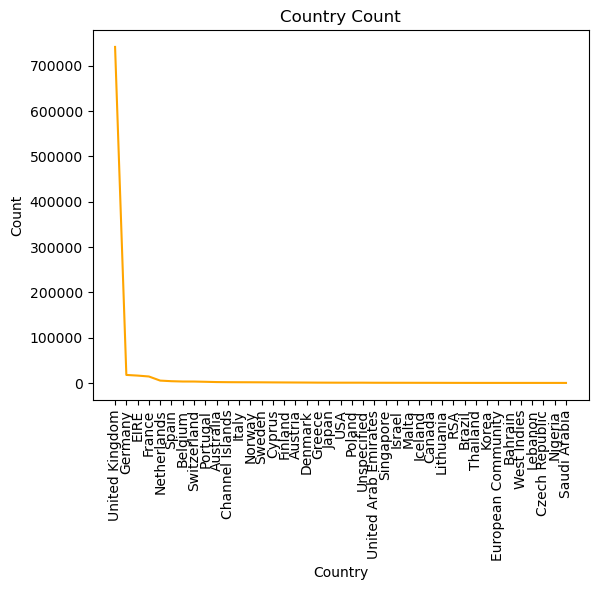

In [14]:
names = country_df.index
cnt=country_df['count']

plt.plot(names, cnt, color='orange')
plt.title('Country Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##### We can see the United Kingdom has the maximum transcations as compared to other countries.

In [15]:
data.groupby("Country")["Quantity"].sum().sort_values(ascending = False).head(10)

Country
United Kingdom    8353502
Netherlands        381951
EIRE               313373
Denmark            235218
Germany            224581
France             183339
Australia          103706
Sweden              87737
Switzerland         51831
Spain               45156
Name: Quantity, dtype: int64

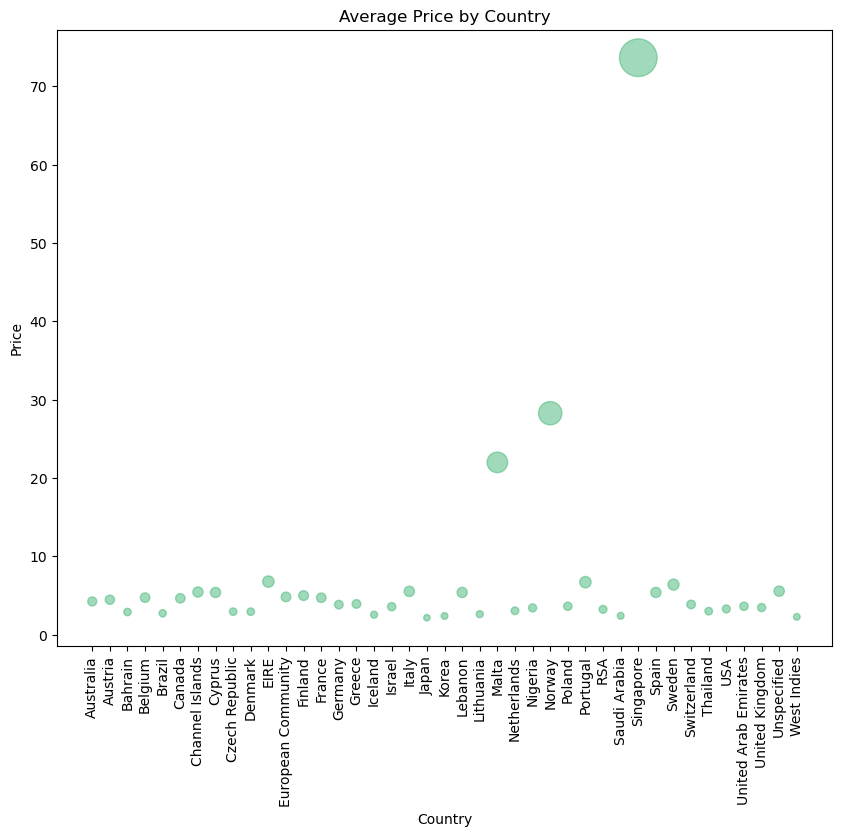

In [16]:
grouped_data = data.iloc[:, [5, 7]].groupby("Country").mean().reset_index()

plt.figure(figsize=(10, 8))
plt.scatter(grouped_data["Country"], grouped_data["Price"], s=grouped_data["Price"]*10, alpha=0.48, color='mediumseagreen')
plt.title("Average Price by Country")
plt.xlabel("Country")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()


##### From the above scatter plot, we can conclude that the Singapore has the highest averge price.

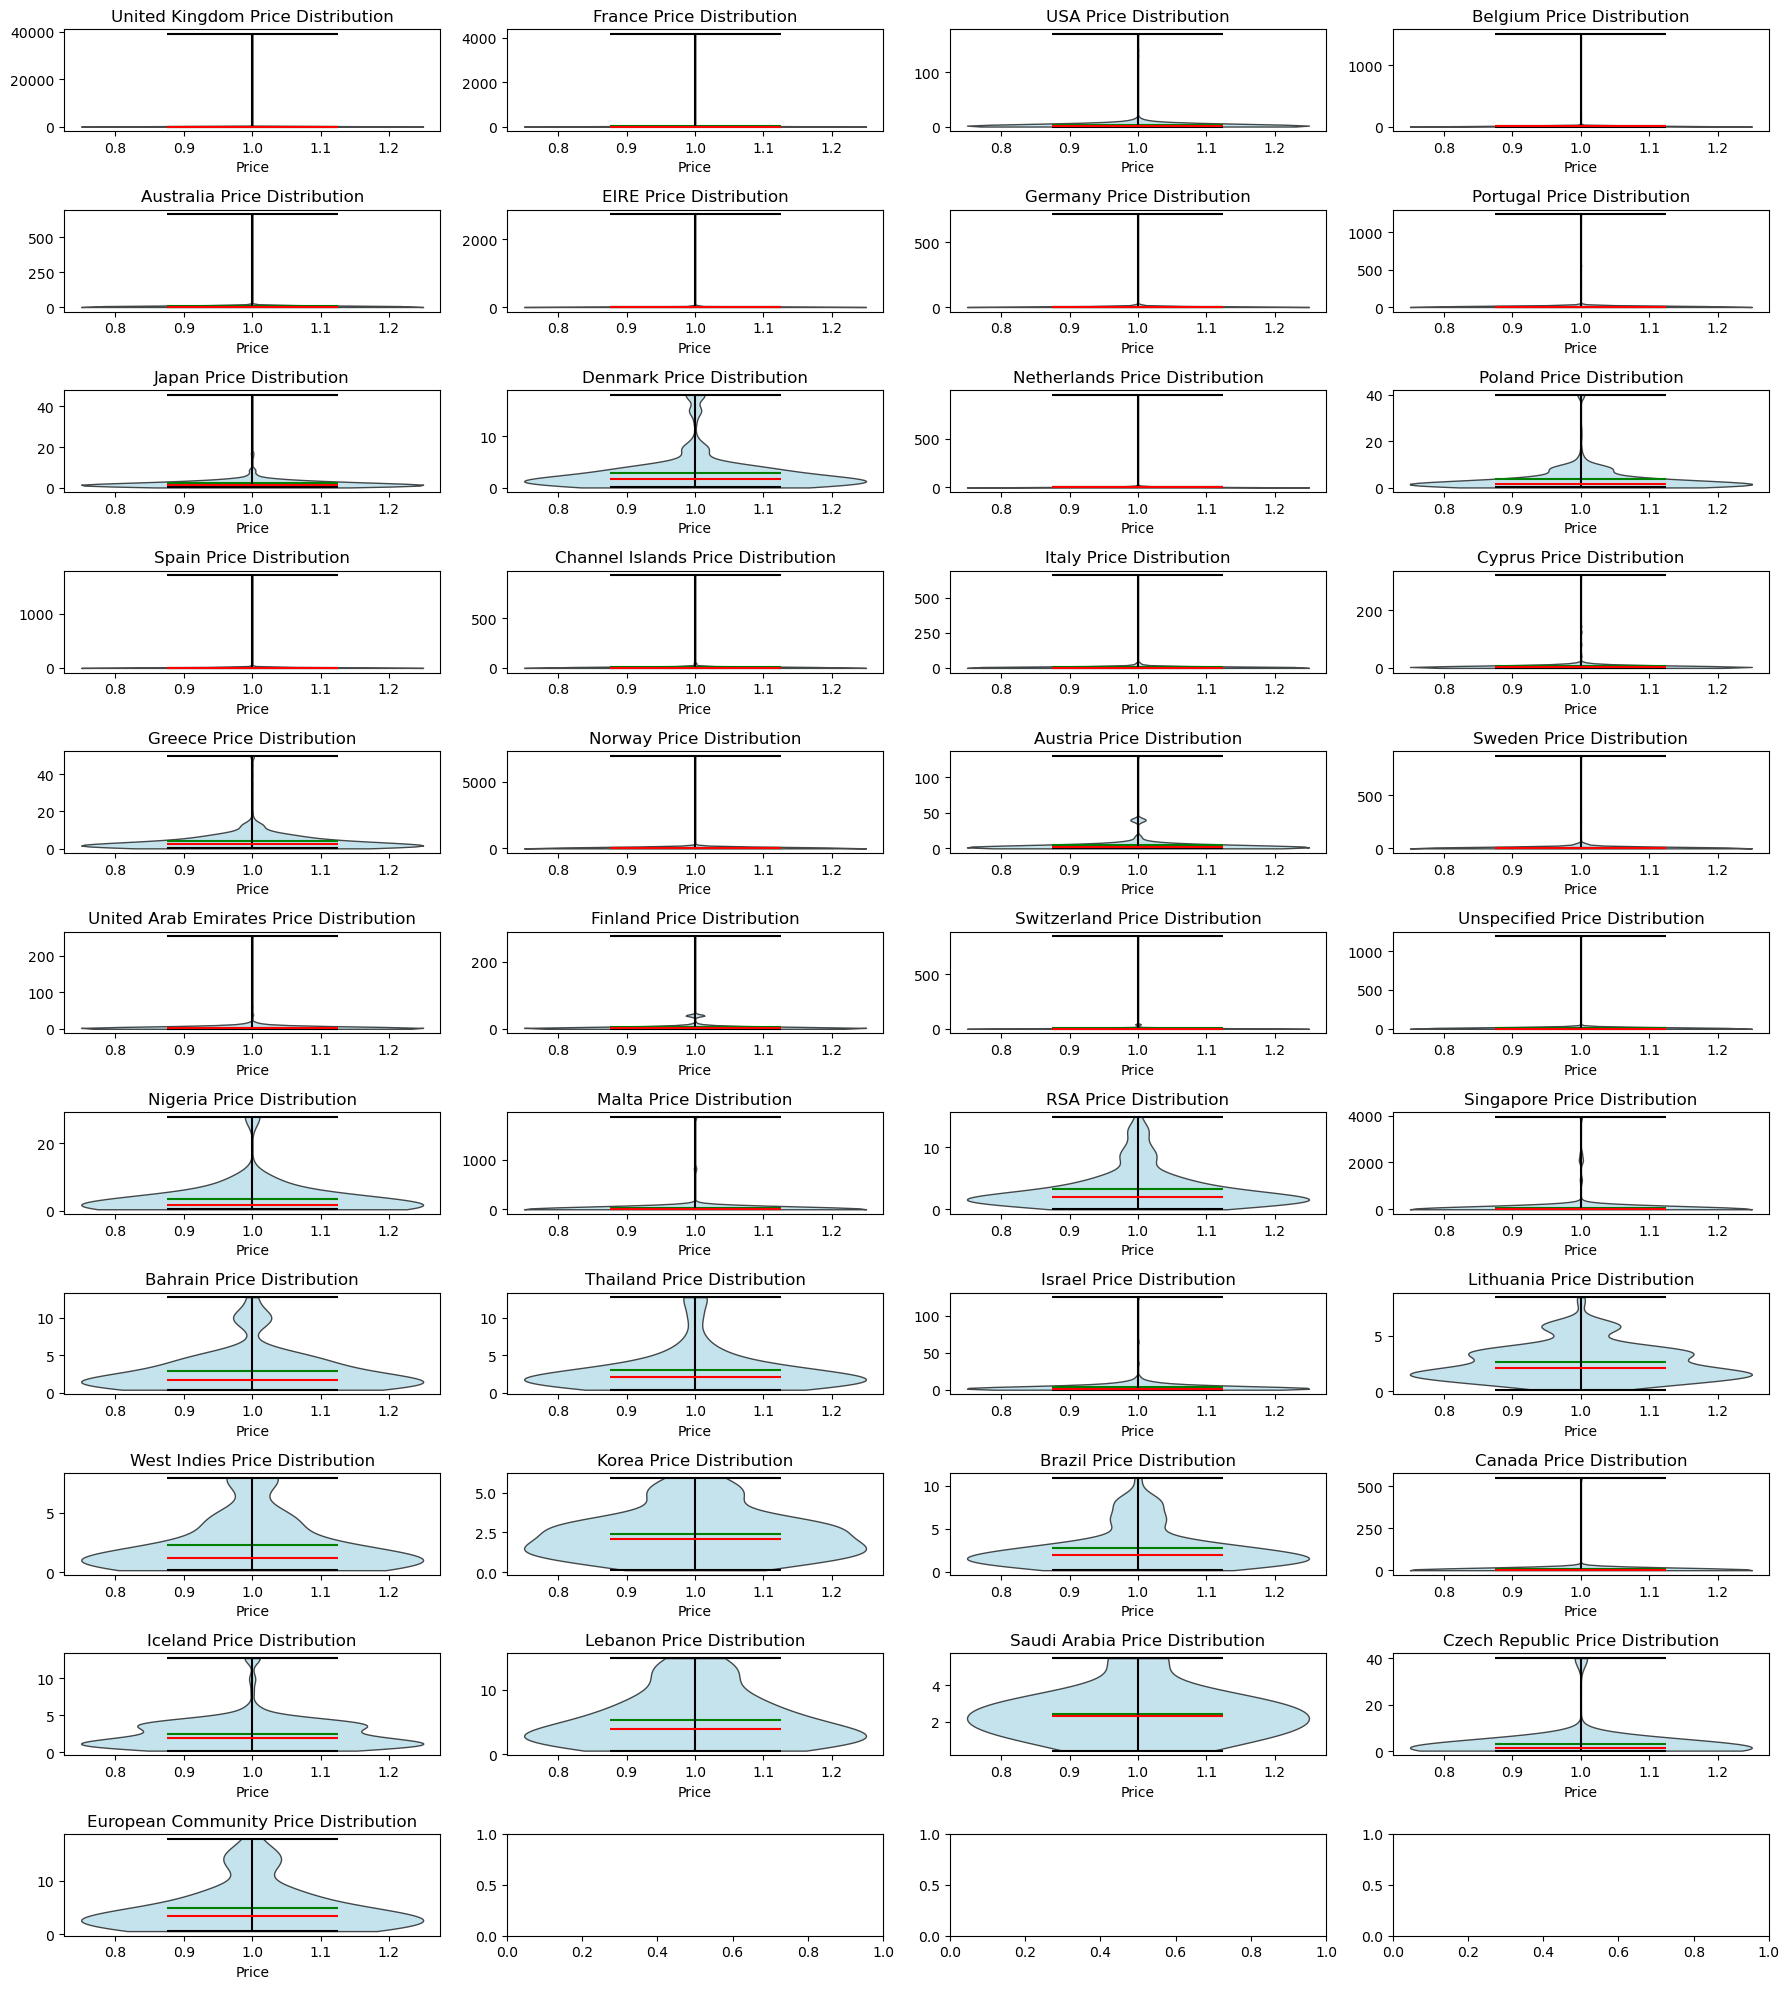

In [17]:
countries = data["Country"].unique()

fig, ax = plt.subplots(11, 4, figsize=(18, 20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    country_data = data[data["Country"] == c]["Price"].dropna() 
    parts = axes_[i].violinplot(country_data, showmeans=True, showmedians=True)
    
    for pc in parts['bodies']:
        pc.set_facecolor('lightblue')
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)

    parts['cbars'].set_edgecolor('black')
    parts['cmins'].set_edgecolor('black')
    parts['cmaxes'].set_edgecolor('black')
    parts['cmedians'].set_edgecolor('red')
    parts['cmeans'].set_edgecolor('green')
    
    axes_[i].set_title(c + ' ' + "Price Distribution")
    axes_[i].set_xlabel('Price')
    
plt.tight_layout()
plt.show()


##### We may infer from the above graphic that the majority of the data is highly skewed and has a large number of high extreme values

In [18]:
data.groupby(["Invoice"]).mean(numeric_only=True).head(20).iloc[:, [1]].sort_values("Price", ascending = False)

,Price
Invoice,
489444,141.000000
489447,130.000000
489465,4.676316
489434,4.081250
489462,3.965385
489436,3.730526
489437,3.628261
489460,3.571333
489439,3.560000


##### To determine the average cost by invoice number, I have categorized the data by invoice. It's interesting to note that the invoice with the numbers **489444** and **489447** has exceeded the total amount spent. So let's examine these two bills to have a better understanding of the quantity they have already purchased.


In [19]:
data[(data["Invoice"] == 489444) | (data["Invoice"] == 489447)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.0,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.0,12362.0,Belgium


##### Because there was just one transaction on the two invoices with the numbers **489444** and **489447**, the average price was too high.


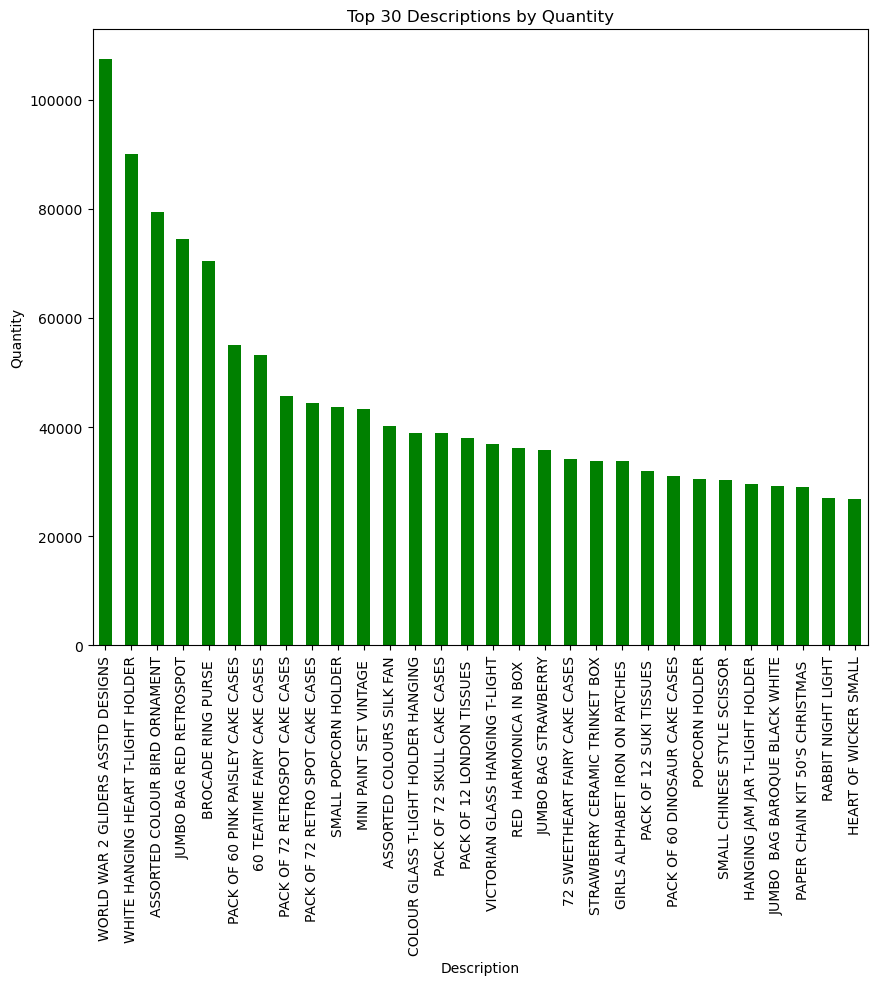

In [20]:
plt.figure(figsize=(10, 8))
top_30 = data.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(30)
top_30.plot(kind="bar", color='green')
plt.title("Top 30 Descriptions by Quantity")
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

##### From the above bar plot, we can infer that the product with description as **World War 2 GLiders Asstd Designs** has been purchased more often.